<a href="https://colab.research.google.com/github/lisabroadhead/data_science_machine-learning/blob/main/SNS_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learn Seaborn
- Derek Banas
- https://www.youtube.com/watch?v=6GUZXDef2U0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = sns.load_dataset('car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Distribution Plot
- ditribution for 1 variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


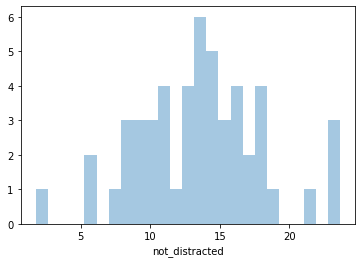

In [12]:
sns.distplot(df['not_distracted'], kde=False, bins=25)
# line is an estimation of the total results in your data

### Joint Plot
-compare two distibutsion

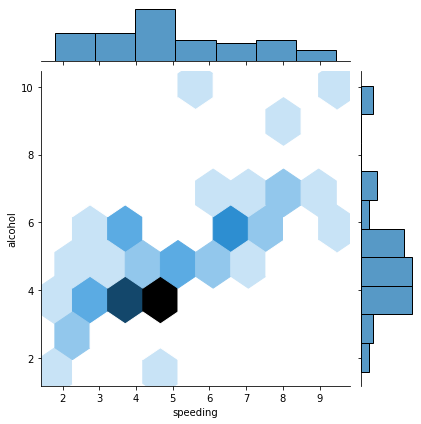

In [21]:
sns.jointplot(x='speeding', y='alcohol', data=df, kind='hex')

### KDE

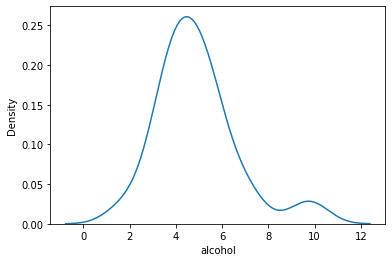

In [22]:
sns.kdeplot(df['alcohol'])

### Pair Plot

KeyboardInterrupt: ignored

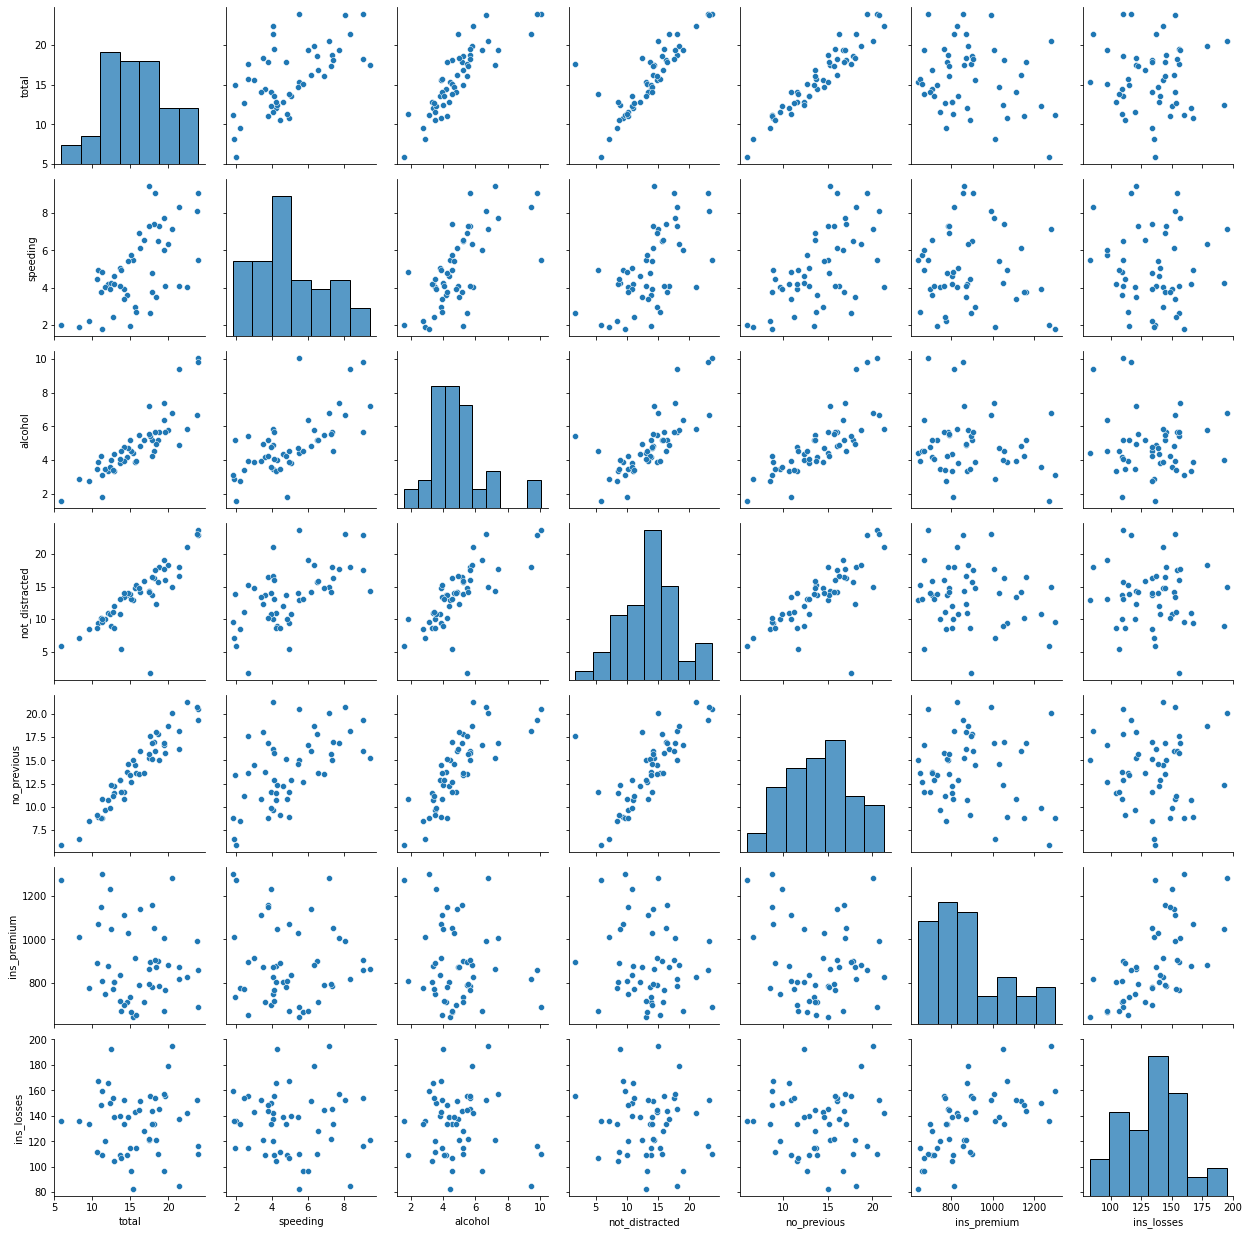

In [24]:
sns.pairplot(df)

In [25]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


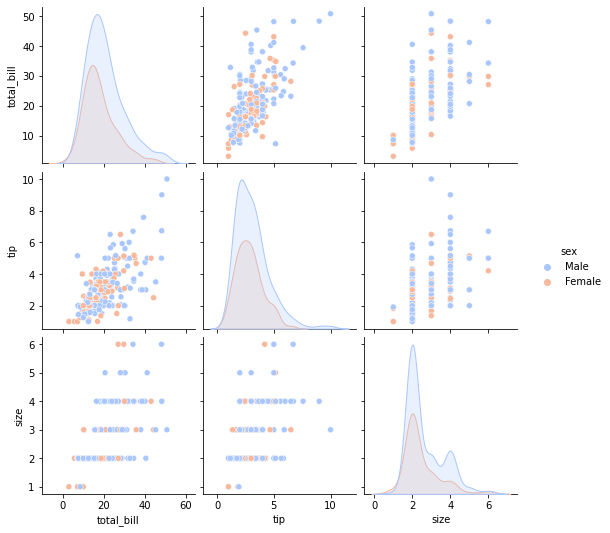

In [27]:
sns.pairplot(tips_df, hue="sex", palette='coolwarm')

### Rug plot

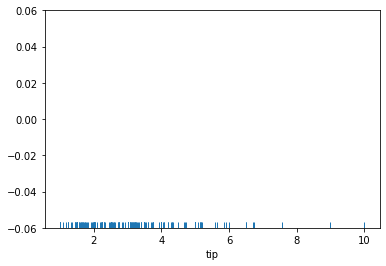

In [28]:
sns.rugplot(tips_df['tip'])
# values are denser where there are more values

## Styling

<Figure size 720x720 with 0 Axes>

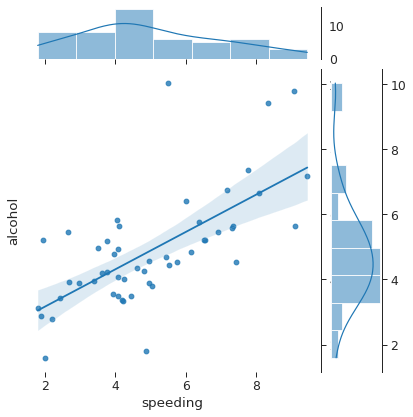

In [47]:
sns.set_style('ticks')

plt.figure(figsize=(10,10))
sns.set_context('paper', font_scale=1.4)
sns.jointplot(x='speeding', y='alcohol', data=df, kind='reg')
sns.despine(left=True, top=True, bottom=True, right=False)
# paper, talk, poster

### Bar Plots

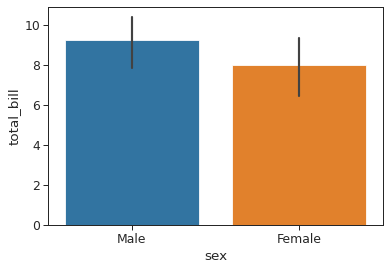

In [55]:
sns.barplot(data=tips_df, x='sex', y='total_bill', estimator=np.std)

### Coutn Plot

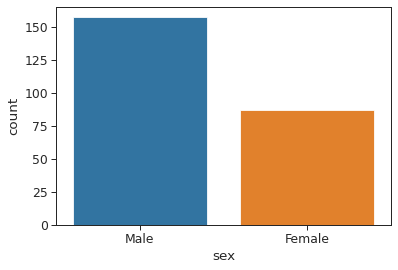

In [56]:
sns.countplot(data=tips_df, x="sex")
# like a histogram, but is ocunts how many of each we have in our dataset

### Box plot

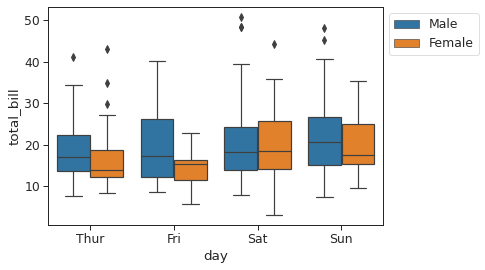

In [59]:
sns.boxplot(data=tips_df, x='day', y='total_bill', hue='sex')
plt.legend(bbox_to_anchor=(1,1))

### Vilion plot

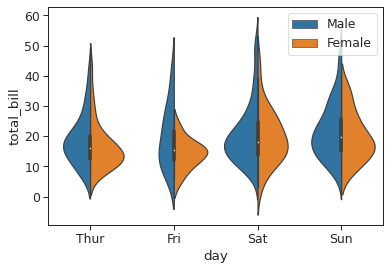

In [61]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)
plt.legend(bbox_to_anchor=(1,1))

### Strip Plots

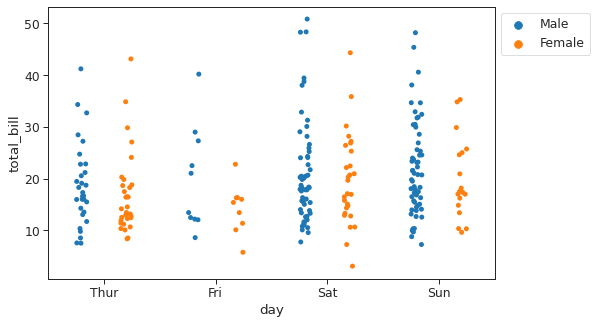

In [68]:
plt.figure(figsize=(8,5))
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True)
plt.legend(bbox_to_anchor=(1,1))

### Swarm Plot

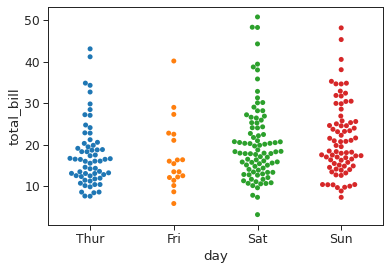

In [73]:
sns.swarmplot(x='day', y='total_bill', data=tips_df)

## Palettes

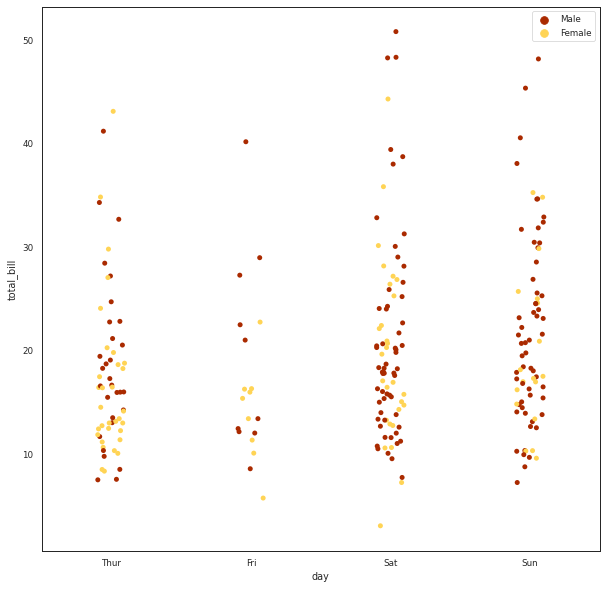

In [80]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.set_context('paper')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='afmhot')
plt.legend(bbox_to_anchor=(1,1))

## Matrix Plots

### heatmap

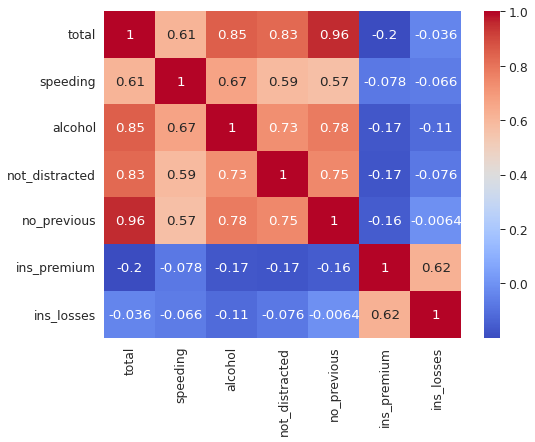

In [91]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

crash_mx = df.corr()
# crash_mx

sns.heatmap(crash_mx,annot=True, cmap='coolwarm')

### pivot table

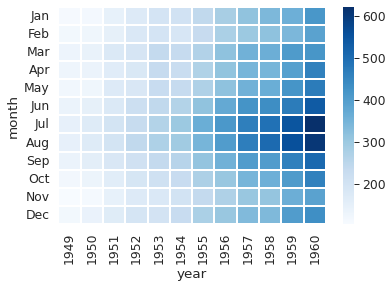

In [97]:
flights = sns.load_dataset('flights')
# flights.head()

flights = flights.pivot_table(index='month', columns='year', values='passengers')
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1)

### Cluster Map

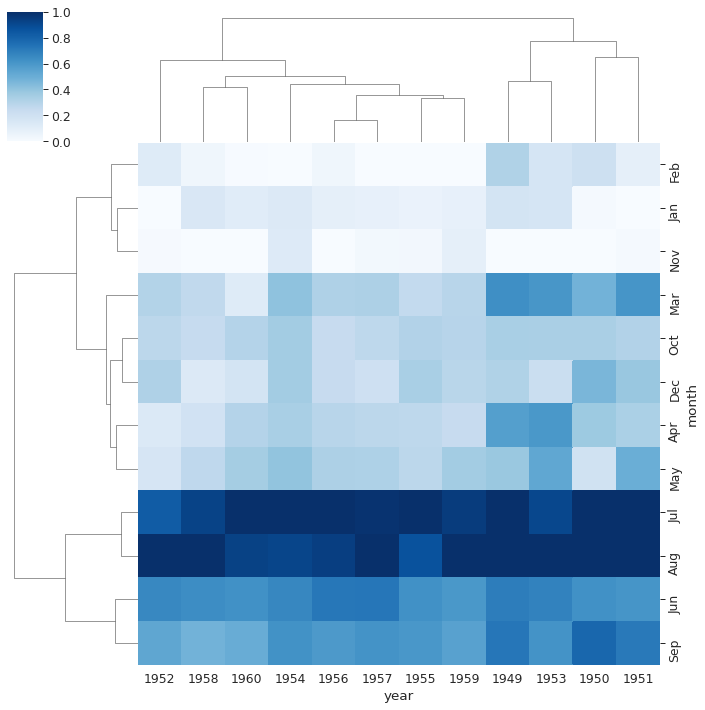

In [103]:
iris = sns.load_dataset('iris')
# species = iris.pop('species')
# sns.clustermap(iris)

sns.clustermap(flights, cmap='Blues', standard_scale=1)
# Like a heat map hut it changes the order of your data: not dates are no longer in order

### Pair Grid

KeyError: ignored

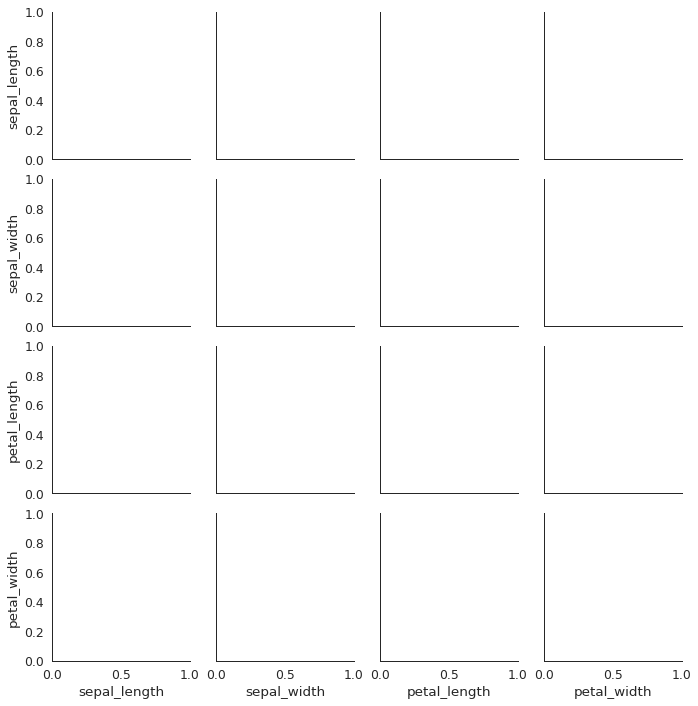

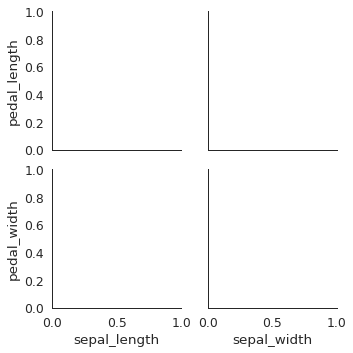

In [112]:
iris_g = sns.PairGrid(iris, hue='species')
# iris_g.map(plt.scatter)
# iris_g.map_diag(plt.hist)
# # iris_g.map_offdiag(plt.scatter)
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

iris_g = sns.PairGrid(iris, hue='species', 
                      x_vars=['sepal_length','sepal_width'],
                      y_vars=['pedal_length', 'pedal_width'])
iris_g.map(plt.scatter)
iris_g.add_legend()

### Facet Grid

NameError: ignored

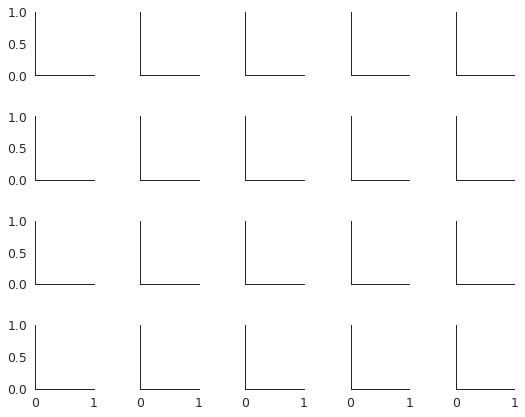

In [130]:
from matplotlib import markers
# tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')
# tips_fg.map(plt.hist, 'total_bill', bins=8)

# tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3, col_order=['Dinner','Lunch'], palette='Set1')
# tips_fg.map(plt.scatter, 'total_bill', 'tip')

# kws= dict(s=50, linewidth=.5, edgecolor='white')
# tips_fg = sns.FacetGrid(tips_df, 
#                         col='sex', 
#                         hue='smoker', 
#                         height=4, 
#                         aspect=1.3, 
#                         hue_order=['Yes','No'], 
#                         hue_kws=dict(marker=['^','v']))
# tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)

att_df = sns.load_dataset('attention')
aff_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

### Regressoin Plots

In [131]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

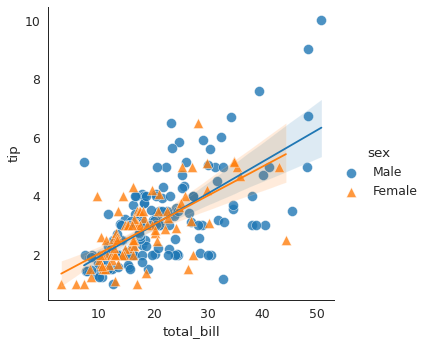

In [134]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o','^'], scatter_kws={'s':100, 'linewidth': 0.5, 'edgecolor': 'white'})

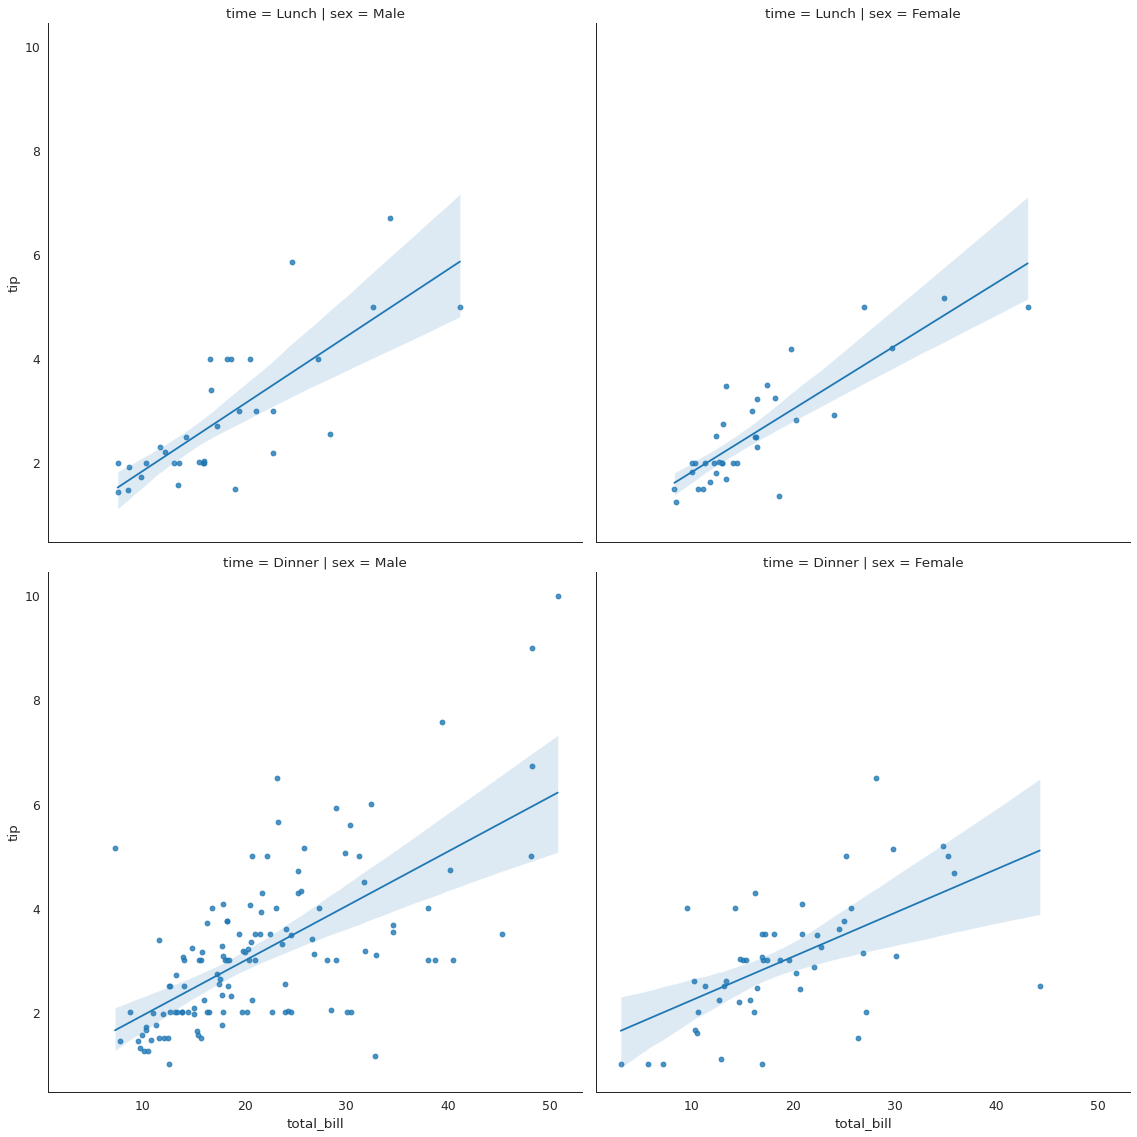

In [137]:
sns.lmplot(x='total_bill', y="tip", data=tips_df, col='sex', row='time', palette='magma', height=8)